In [2]:
%matplotlib inline
import os
import sys
import itertools

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

import climatools.plot.plot

from IPython import display

import imp
del xr.DataArray.climaviz
imp.reload(climatools.plot.plot)

<module 'climatools.plot.plot' from '/nuwa_cluster/home/jackyu/climatools/climatools/plot/plot.py'>

In [6]:
dir_run = os.path.join('/nuwa_cluster/home/jackyu', 
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       '1.e-19')
                       
path_dgdgs = os.path.join(dir_run, 'dgdgs.dat')
path_absmean = os.path.join(dir_run, 'absmean.dat')
path_fluxg = os.path.join(dir_run, 'output_fluxg.dat')
path_coolrg = os.path.join(dir_run, 'output_coolrg.dat')
path_flux = os.path.join(dir_run, 'output_flux.dat')
path_coolr = os.path.join(dir_run, 'output_coolr.dat')
                       

In [7]:
# load CRD's fluxes and cooling rates

# load fluxg
df = pd.read_csv(path_fluxg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'].isel(g=0))
ds_fluxg = ds

# load coolrg
df = pd.read_csv(path_coolrg, sep=r'\s+')
df = df.set_index(['pressure', 'g'])
ds = xr.Dataset.from_dataframe(df)
ds.coords['layer'] = ('pressure', ds['layer'].isel(g=0))
ds_coolrg = ds

# load flux
df = pd.read_csv(path_flux, sep=r'\s+')
df = df.set_index(['pressure'])
ds = xr.Dataset.from_dataframe(df)
ds_flux = ds.set_coords(['level'])

# load coolr
df = pd.read_csv(path_coolr, sep=r'\s+')
df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds_coolr = ds.set_coords(['layer'])

In [8]:
# load mean absorption coefficient and k-distribution functions
# calculated by CRD

# load absmean
df = pd.read_csv(path_absmean, sep=r'\s+')
df = df.set_index(['pressure', 'g'])

ds = xr.Dataset.from_dataframe(df)
ds_absmean = ds.set_coords(['layer'])

# load dgdgs
df = pd.read_csv(path_dgdgs, sep=r'\s+')
df = df.set_index(['g'])

ds_dgdgs = xr.Dataset.from_dataframe(df)

In [14]:
###
names_var = ['flug', 'fnetg', 'coolrg']
colors = ['darkred', 'lightcoral', 'blue']
dict_color = dict(zip(names_var, colors))

###
names_model = ['crd', 'clirad']
linestyles = ['-', '--']
dict_linestyle = dict(zip(names_model, linestyles))

### 
yscales = ['linear', 'log']
varlims_from_indexrange = [(50, 1050), (1e-4, 50)]
dict_varlim = dict(zip(yscales, varlims_from_indexrange))

###
vartypes = ['flux', 'cooling rate']
names_allowedvar = [['flug', 'fnetg'], ['coolrg']]
dict_names_allowedvar = dict(zip(vartypes, names_allowedvar))


### what data have we?
vartypes = ['flux', 'cooling rate']
names_model = ['crd']
dss_flux = [ds_fluxg]
dss_cool = [ds_coolrg, ]
names_ds = list(itertools.product(vartypes, names_model))
dss = list(ds 
           for ds in itertools.chain(dss_flux, dss_cool)
           if ds)
dict_ds = dict(zip(names_ds, dss))


### what to plot in each axis
names_ax = list(itertools.product(vartypes, yscales))




-----  g-group 1  ---------------


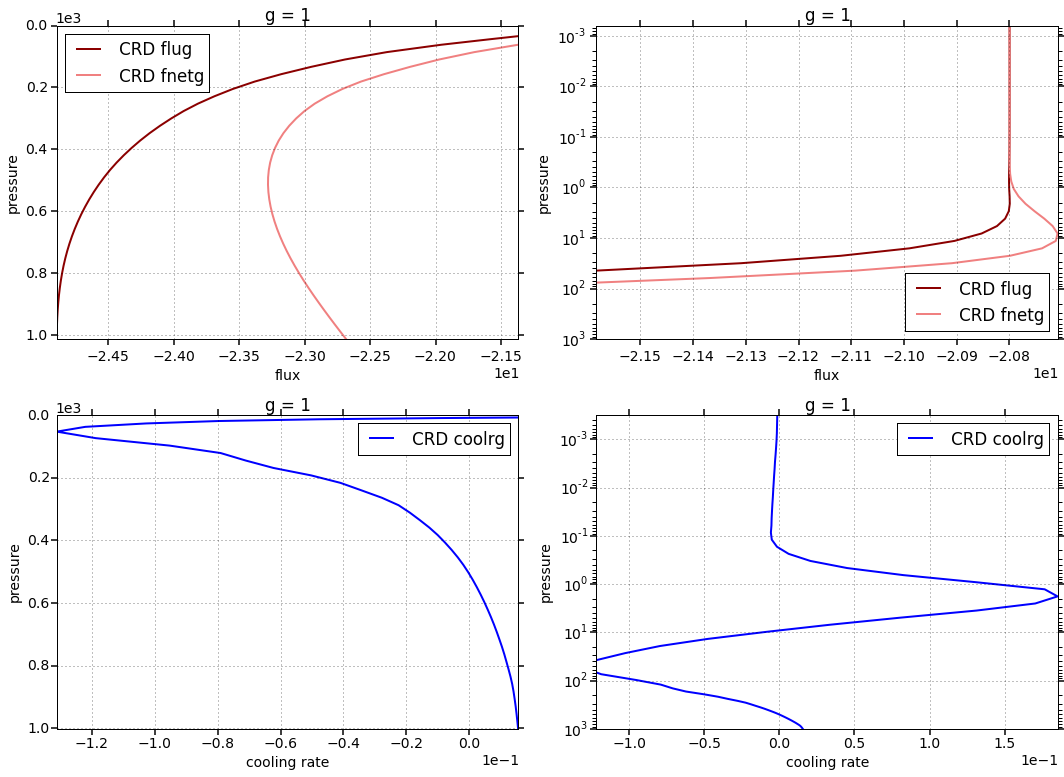


-----  g-group 2  ---------------


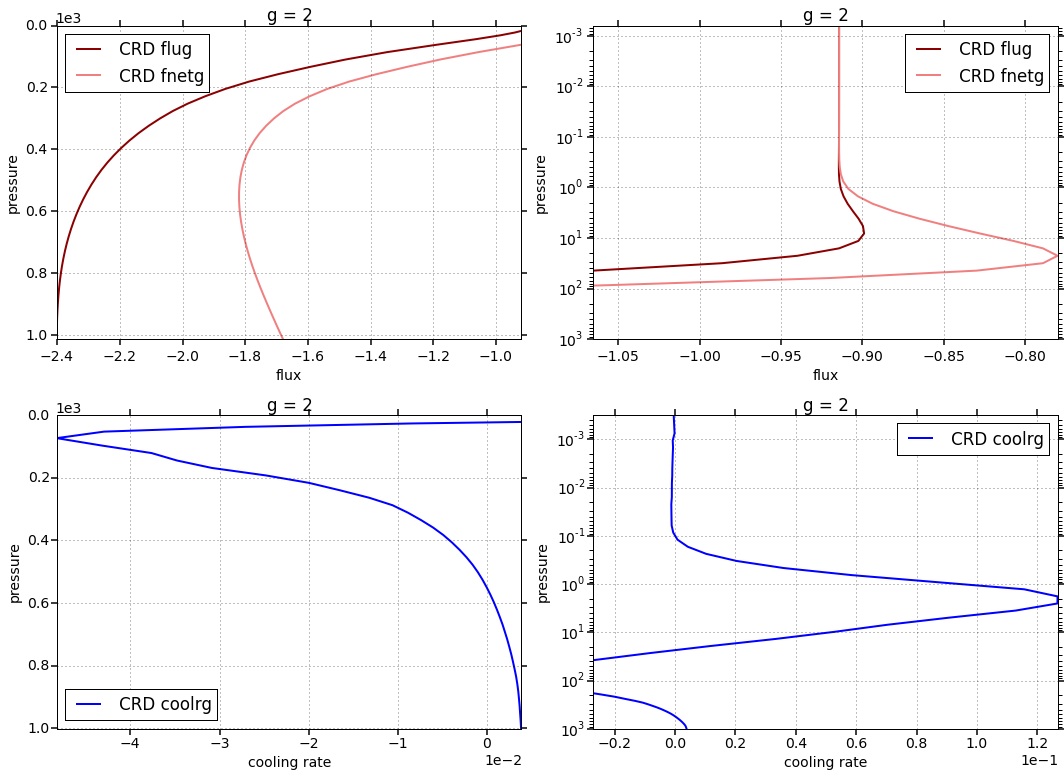


-----  g-group 3  ---------------


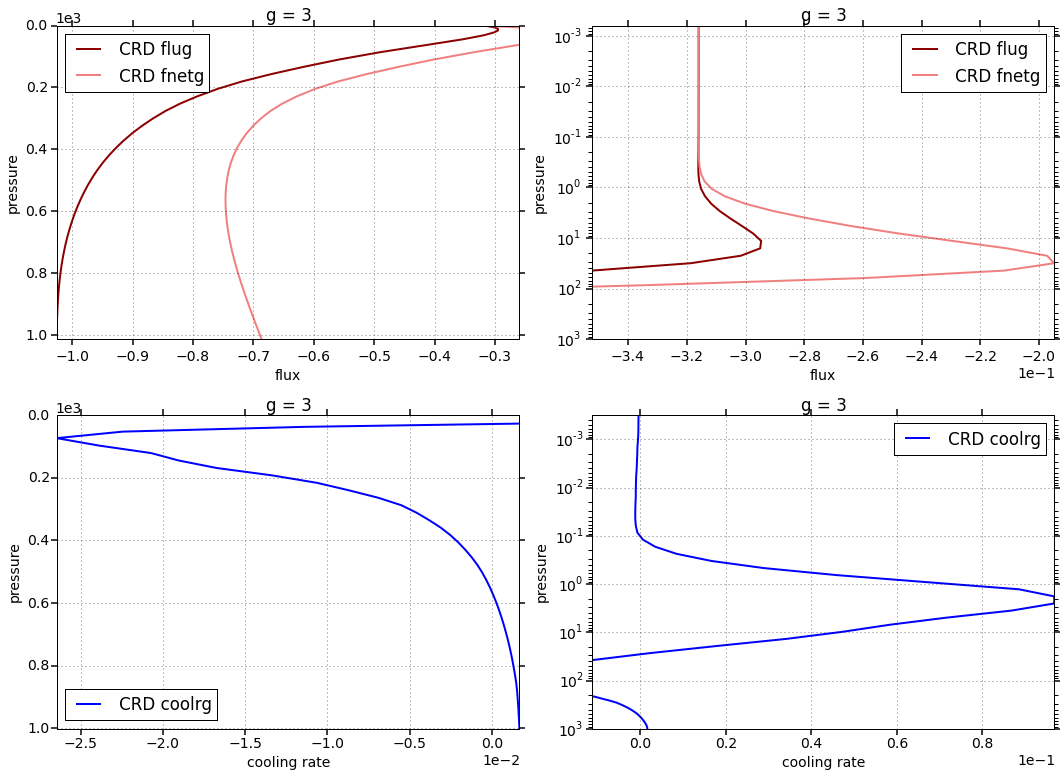


-----  g-group 4  ---------------


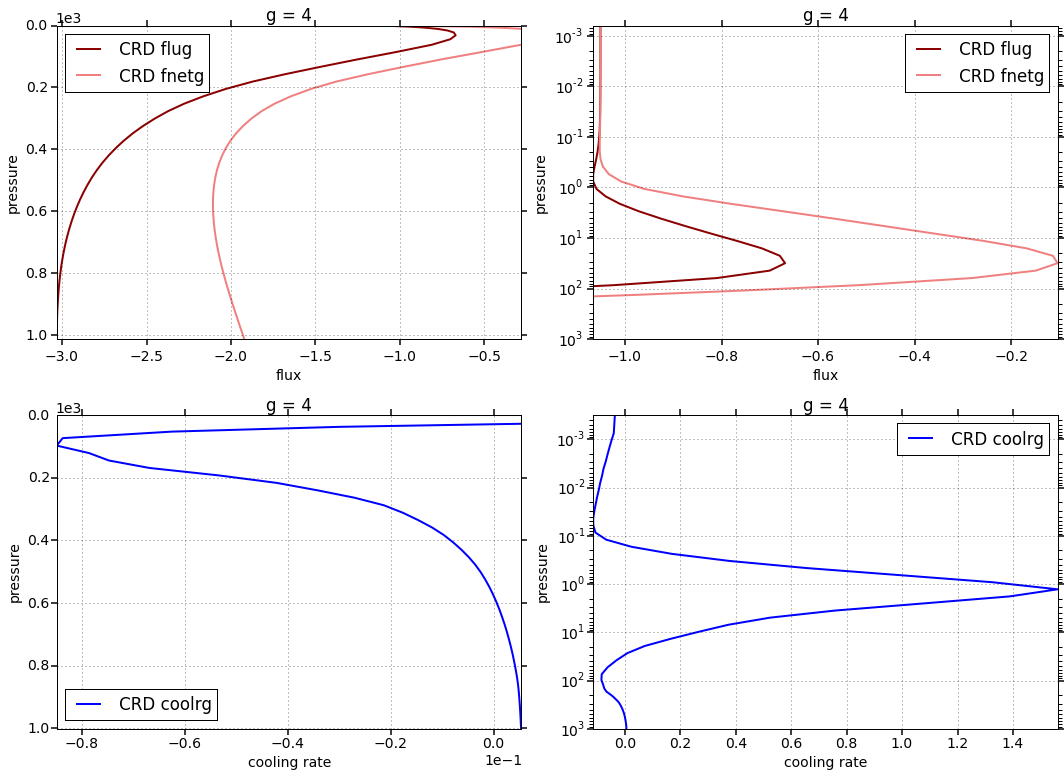

In [15]:
matplotlib.rcParams.update({'font.size': 14})

for g in [1, 2, 3, 4]:
    
    print()
    print(5 * '-' + '  g-group {}  '.format(g) + 15 * '-')
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))
    axs = axs.flatten()

    for ax, (vartype, yscale) in zip(axs, names_ax):
        for name_var in dict_names_allowedvar[vartype]:
            for model in names_model:
                #print(ax, vartype, yscale, name_var, model)
                ds = dict_ds[(vartype, model)]
                ds[name_var].sel(g=g)\
                .climaviz\
                .plot(ax=ax, 
                      linewidth=2, grid=True,
                      label=model.upper() + ' ' + name_var,
                      color=dict_color[name_var],
                      linestyle=dict_linestyle[model],
                      index_on_yaxis=True, 
                      yincrease=False, yscale=yscale,
                      varlim_from_indexrange=dict_varlim[yscale])
            
                ax.set_xlabel(vartype)
                
                ax.yaxis.set_tick_params(which='major',
                                         direction='out',
                                         size=6, width=1.5)
                ax.yaxis.set_tick_params(which='minor',
                                         direction='out',
                                         size=4, width=1.)
                
                ax.xaxis.set_tick_params(which='major',
                                         direction='out',
                                         size=6, width=1.5)
                ax.xaxis.set_tick_params(which='minor',
                                         direction='out',
                                         size=4, width=1.)
            
    plt.tight_layout()
    display.display(plt.gcf())
    plt.close()

In [16]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')